In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/india-trade-data/2018-2010_export.csv
/kaggle/input/india-trade-data/2018-2010_import.csv


In [2]:
exportdf = pd.read_csv("/kaggle/input/india-trade-data/2018-2010_export.csv")
importdf = pd.read_csv("/kaggle/input/india-trade-data/2018-2010_import.csv")

In [3]:
importdf.drop_duplicates(inplace=True)
exportdf.drop_duplicates(inplace=True)

In [4]:
print("Export Unqiue: "+str(len(exportdf['Commodity'].unique())))
print("Import Unqiue: "+str(len(importdf['Commodity'].unique())))

Export Unqiue: 98
Import Unqiue: 98


In [5]:
print("Export Value Sum: "+str(exportdf['value'].sum()))
print("Import Value Sum: "+str(importdf['value'].sum()))

Export Value Sum: 2652519.47
Import Value Sum: 3993020.3600000003


In [6]:
print("Total Deficit of 10 year: "+str(exportdf['value'].sum()-importdf['value'].sum()))

Total Deficit of 10 year: -1340500.8900000001


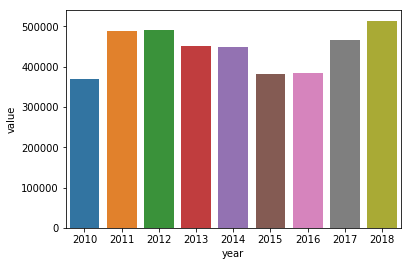

In [7]:
growthImport = importdf.groupby('year').agg({'value':sum})
sns.barplot(y=growthImport.value,x=growthImport.index)

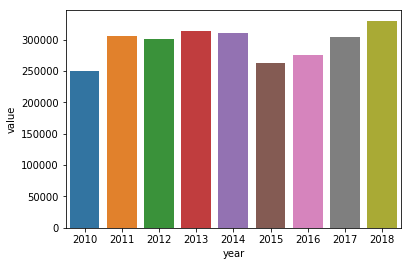

In [8]:
growthExport = exportdf.groupby('year').agg({'value':sum})
sns.barplot(y=growthExport.value,x=growthExport.index)

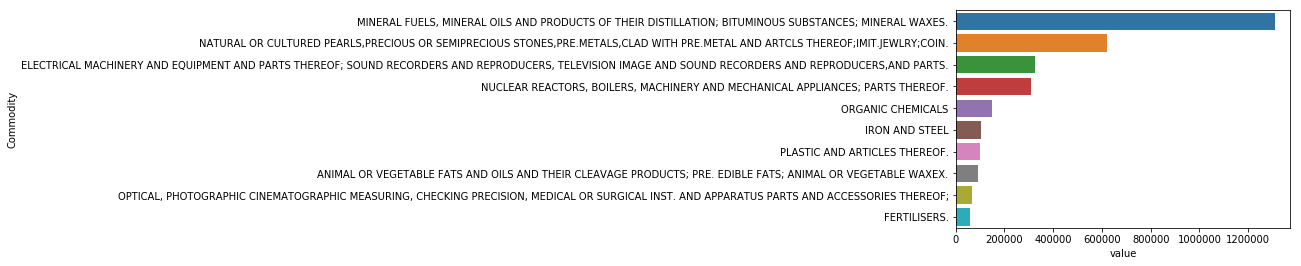

In [9]:
commodity = importdf[['value','Commodity']].groupby('Commodity').agg({'value':'sum'}).sort_values(by='value', ascending = False)[:10]
sns.barplot(y=commodity.index,x=commodity.value)

In [10]:
most_expensive = importdf[importdf.value>1000]
most_expensive1 = most_expensive.groupby(['country']).agg({'value':'sum'})
most_expensive1.sort_values(by='value',ascending=False)
most_expensive1

,value
country,
ALGERIA,6651.58
ANGOLA,41640.18
ARGENTINA,12050.07
AUSTRALIA,81728.59
AZERBAIJAN,1128.72
BELGIUM,64204.88
BOTSWANA,2943.78
BRAZIL,18602.56
CANADA,6028.00


[Text(0, 0, "(27, 'SAUDI ARAB')"),
 Text(0, 0, "(71, 'SWITZERLAND')"),
 Text(0, 0, "(85, 'CHINA P RP')"),
 Text(0, 0, "(27, 'IRAQ')"),
 Text(0, 0, "(71, 'U ARAB EMTS')"),
 Text(0, 0, "(27, 'U ARAB EMTS')"),
 Text(0, 0, "(27, 'NIGERIA')"),
 Text(0, 0, "(84, 'CHINA P RP')"),
 Text(0, 0, "(27, 'QATAR')"),
 Text(0, 0, "(27, 'KUWAIT')"),
 Text(0, 0, "(27, 'IRAN')"),
 Text(0, 0, "(27, 'VENEZUELA')"),
 Text(0, 0, "(71, 'BELGIUM')"),
 Text(0, 0, "(27, 'AUSTRALIA')"),
 Text(0, 0, "(71, 'HONG KONG')")]

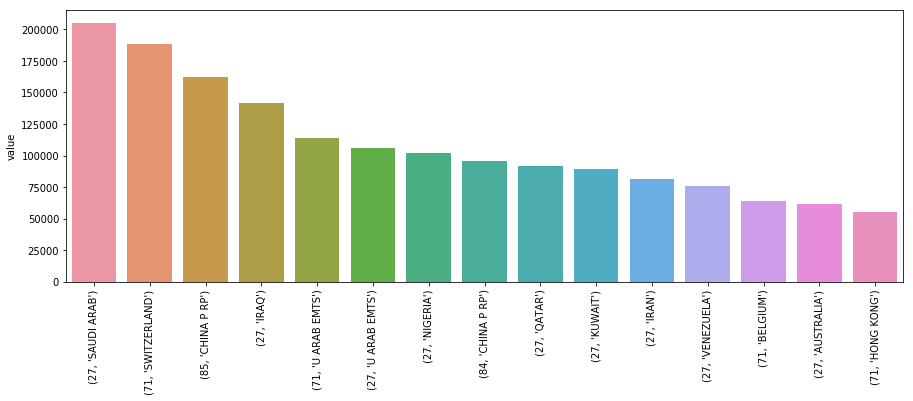

In [11]:
plt.figure(figsize=(15,5))
most_expensiveHSCode = most_expensive.groupby(['HSCode','country']).agg({'value':'sum'}).sort_values(by='value',ascending=False)[:15]
sns.barplot(most_expensiveHSCode.index,most_expensiveHSCode.value).set_xticklabels(sns.barplot(most_expensiveHSCode.index,most_expensiveHSCode.value).get_xticklabels(),rotation="90")